# 1. <a id='toc1_'></a>[Titanic](#toc0_)

**Table of contents**<a id='toc0_'></a>    
1. [Titanic](#toc1_)    
1.1.1. [Importación de librerías](#toc1_1_1_)    
1.2. [Primeros pasos en el tratamiendo de los datos](#toc1_2_)    
1.2.1. [Leemos el DataFrame](#toc1_2_1_)    
1.2.2. [Corregimos los nombres de las columnas](#toc1_2_2_)    
1.2.3. [Cambiamos el nombre de las ciudades de salida de los pasajeros](#toc1_2_3_)    
1.2.4. [Cambiamos los valores de la columnas PCLASS a Primera, Segunda y Tercera y los hacemos string](#toc1_2_4_)    
1.2.5. [Cambiamos los valores de la columna SURVIVED a booleanos](#toc1_2_5_)    
1.2.6. [Comprobamos el número de valores nulos, su porcentaje y representamos en un mapa de calor](#toc1_2_6_)    
1.2.7. [Corregimos con la moda ya que el porcentaje de valores nulos es menos que el 20% de los datos.](#toc1_2_7_)    
1.2.8. [Veamos un poco de la información que nos dan los datos para hacernos una idea de lo que tenemos para trabajar](#toc1_2_8_)    
1.3. [Gráficas](#toc1_3_)    
1.4. [Títulos y nube de palabras. Gracias, Demetrio.](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### 1.1.1. <a id='toc1_1_1_'></a>[Importación de librerías](#toc0_)

In [13]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly_express as px
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import streamlit as st

## Información de las columnas del dataset

| Variable | Definition                       | Key                                         |
|----------|----------------------------------|---------------------------------------------|
| survival | Survival                         | 0 = No, 1 = Yes                             |
| pclass   | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex      | Sex                              |                                             |
| Age      | Age in years                     |                                             |
| sibsp    | # of siblings / spouses aboard   |                                             |
| parch    | # of parents / children aboard   |                                             |
| ticket   | Ticket number                    |                                             |
| fare     | Passenger fare                   |                                             |
| cabin    | Cabin number                     |                                             |
| embarked | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |


In [14]:
titan = pd.read_csv('data/titanic_limpio.csv')

## Comenzamos las gráficas

In [15]:
symbols = ['cross', 'star']
colores = ['#972a27', '#00be4c']

edad_precio = px.scatter(titan, x='AGE', y='FARE', color='SURVIVED', size_max=25, symbol="SEX", symbol_sequence=symbols, color_discrete_sequence=colores, template='plotly_dark', title="Relación entre la edad, el precio del pasaje y la supervivencia de los pasajeros", labels={"AGE": "Edad", "SURVIVED": "Superviviente", 'FARE': 'Precio pasaje'}, symbol_map={})

edad_precio.show()

In [16]:
hist_edad = px.histogram(titan, x="AGE", color='SURVIVED', barmode='group', nbins=40,  template='plotly_dark', labels={"AGE": "Edad", "SURVIVED": "Superviviente"}, color_discrete_sequence=colores, title="Distribución de la edad de los pasajeros")
hist_edad.update_yaxes(title_text='Número de pasajeros')
hist_edad.show()

In [17]:
# Convertir los datos en long-form
titan_long = pd.melt(titan, id_vars=["SURVIVED"], value_vars=[
                     "SEX", "AGE"], var_name="variable")
# Va representar la supervivencia frente al sexo y la edad
sexo_edad_superv = px.histogram(titan_long, x="value", color="SURVIVED", nbins=40, opacity=0.7,
                                marginal="rug", barmode="overlay",color_discrete_sequence=colores, labels={"value": "Sexo/Edad", "count": "Cantidad de pasajeros"},
                                facet_col="variable", category_orders={"variable": ["SEX", "AGE"]}, template="plotly_dark")
# Establecer el título y las etiquetas de los ejes
hist_edad.update_layout(title="Distribución de sexo y edad por Supervivencia",
                  xaxis_title="Sexo/Edad",
                  yaxis_title="Cantidad de pasajeros")

sexo_edad_superv.show()

No me gusta demasiado...

In [18]:
sexo_edad_superv = px.histogram(titan, x='AGE', color='SURVIVED', barmode='overlay', nbins=40,
                   marginal='box', opacity=0.7, template='plotly_dark', facet_col='SEX',color_discrete_sequence=colores,
                   category_orders={'SEX': ['male', 'female'], 'SURVIVED': ['Dead', 'Alive']})

sexo_edad_superv.update_layout(
    title='Distribución de edades por género y supervivencia',
    xaxis_title='Edad',
    yaxis_title='Número de pasajeros'
)
sexo_edad_superv.show()

In [19]:
# Agrupar por género y contar el número de pasajeros por género
gender_counts = titan.groupby('SEX')['PASSENGERID'].count().reset_index()

# Crear el gráfico de pastel
fig = px.pie(gender_counts, values='PASSENGERID', names='SEX', title='Distribución de género de los pasajeros', template='plotly_dark')
fig.show()

In [20]:
# Agrupar por supervivencia y contar el número de pasajeros por supervivencia
survival_counts = titan.groupby('SURVIVED')['PASSENGERID'].count().reset_index()

# Crear el gráfico de pastel
survival_counts = px.pie(survival_counts, values='PASSENGERID', names='SURVIVED', color_discrete_sequence=colores, title='Supervivencia de los pasajeros', template='plotly_dark')
survival_counts.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colores, line=dict(color='#000000', width=2)))
survival_counts.show()

In [21]:
# Group by gender and count the number of passengers
gender_counts = titan.groupby('SEX')['PASSENGERID'].count().reset_index()

# Group by survival and count the number of passengers
survival_counts = titan.groupby('SURVIVED')['PASSENGERID'].count().reset_index()

# Create subplots with two rows and one column
donuts = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'},{'type': 'pie'}]])

# Add the first pie chart to the first row
donuts.add_trace(
    go.Pie(
        labels=gender_counts['SEX'],
        values=gender_counts['PASSENGERID'],
        hole=0.6,
        name='Género',
        textinfo='percent+label',
        hoverinfo='label+percent',
        showlegend=True,
    ),
    row=1, col=1,
)

# Add the second pie chart to the second row
donuts.add_trace(
    go.Pie(
        labels=survival_counts['SURVIVED'],
        values=survival_counts['PASSENGERID'],
        hole=0.6,
        name='Supervivencia',
        marker=dict(colors=colores),
        textinfo='percent+label',
        hoverinfo='label+percent',
        showlegend=True,
    ),
    row=1, col=2,
)

donuts.update_traces(
    textfont=dict(color='white', size=25),
    hovertemplate=None,
    textposition='inside',
)

# Set the title and layout of the figure
donuts.update_layout(
    title='Distribución de género y supervivencia de los pasajeros',
    height=800,
    showlegend=True,template = 'plotly_dark'
)

# Show the figure
donuts.show()


In [22]:
passenger_class = titan.groupby(['PCLASS', 'SURVIVED']).size().reset_index(name='count')
passenger_class['SURVIVED'] = passenger_class['SURVIVED'].map({'Dead': 'No', 'Alive': 'Sí'})

biglietti = px.bar(passenger_class, x="PCLASS", y="count", color="SURVIVED",color_discrete_sequence=colores, barmode='group', template='plotly_dark', labels={"PCLASS": "Clase de pasajero", "count": "Número de pasajeros", "SURVIVED": "Sobreviviente"}, title="Número de pasajeros por tipo de pasaje")

biglietti.show()

In [23]:
pclass_order = ['Primera', 'Segunda', 'Tercera']
tarifas = px.box(titan, x="PCLASS", y="FARE", points="all", labels={'PCLASS': 'Clase de pasajero', 'FARE': 'Tarifa del pasaje'}, color='PCLASS', template="plotly_dark",category_orders={'PCLASS': pclass_order})
tarifas.update_layout(title="Distribución de tarifas por clase de pasajero")
tarifas.show()

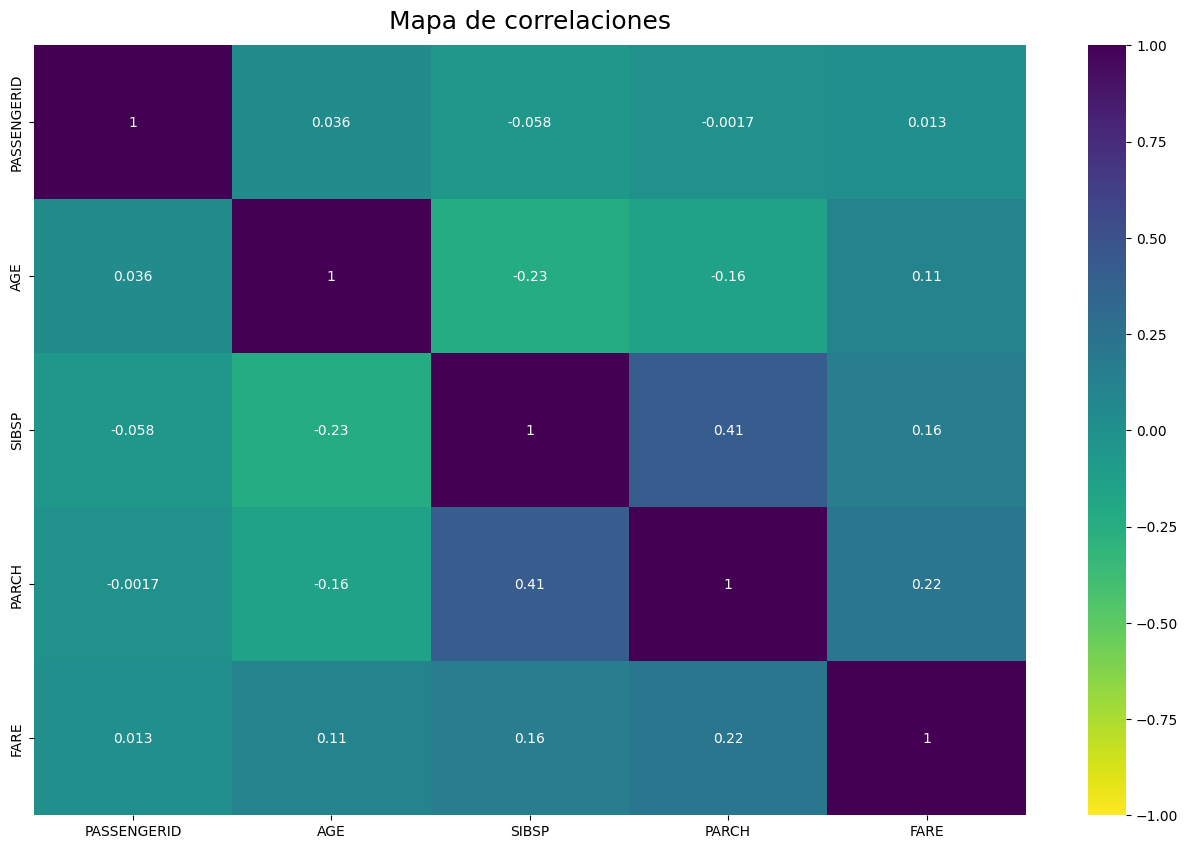

In [24]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(titan.corr(numeric_only=True), vmin = -1, vmax = 1, annot = True, cmap= "viridis_r")
heatmap.set_title("Mapa de correlaciones", fontdict = {"fontsize" : 18}, pad = 12)
plt.savefig("correlacion_titanic.png", dpi = 300, bbox_inches = 'tight')

In [25]:
corr = titan.corr(numeric_only=True)
correlation = px.imshow(corr, color_continuous_scale='viridis_r', zmin=-1, zmax=1)
correlation.update_layout(title="Correlación entre variables", template="plotly_dark")
correlation.show()

In [26]:
colors = {'Dead': '#972a27', 'Alive': '#00be4c'}
compare = go.Figure(
    data=go.Splom(
        dimensions=[
            dict(
                label="SURVIVED",
                values=titan["SURVIVED"],
            ),
            dict(label="PCLASS", values=titan["PCLASS"]),
            dict(label="SEX", values=titan["SEX"]),
            dict(label="AGE", values=titan["AGE"]),
            dict(label="SIBSP", values=titan["SIBSP"]),
            dict(label="PARCH", values=titan["PARCH"]),
            dict(label="FARE", values=titan["FARE"]),
        ],
        showupperhalf=False,
        marker=dict(showscale=False, line_color="white",
                    color=titan["SURVIVED"].map(colors)),
    )
)
# Añadimos el título y ajustamos el tamaño
compare.update_layout(
    title="Matriz de comparación para los datos del Titanic",
    autosize=False,
    width=900,
    height=900,
    template="plotly_dark",
)

# Mostramos la figura
compare.show()

In [27]:
titan

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,Dead,Tercera,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,Southampton
1,2,Alive,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburgo
2,3,Alive,Tercera,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,Southampton
3,4,Alive,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Dead,Tercera,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,Segunda,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,Southampton
887,888,Alive,Primera,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,Dead,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,Unknown,Southampton
889,890,Alive,Primera,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherburgo


Ruta prevista para el Titanic: Southampton - Cherburgo - Queenstown - Nueva York

In [28]:
EMBARKED_counts = titan.groupby('EMBARKED')['PASSENGERID'].count().reset_index()
# Especificar el orden deseado de las ciudades de embarque
order = ['Southampton', 'Cherburgo', 'Queenstown']
embark = px.bar(EMBARKED_counts, x='EMBARKED', y='PASSENGERID', labels={'EMBARKED':'Ciudad de embarque', 'PASSENGERID':'Cantidad de pasajeros'}, template='plotly_dark', category_orders={'EMBARKED': order})
embark.show()


In [29]:
EMBARKED_survival_counts = titan.groupby(['EMBARKED', 'SURVIVED'])['PASSENGERID'].count().reset_index()

EMBARKED_survival_counts['Total'] = EMBARKED_survival_counts.groupby(['EMBARKED'])['PASSENGERID'].transform('sum')
EMBARKED_survival_counts['Proportion'] = EMBARKED_survival_counts['PASSENGERID'] / EMBARKED_survival_counts['Total']

order = ['Southampton', 'Cherburgo', 'Queenstown']

surv_embark = go.Figure()
surv_embark.add_trace(go.Bar(x=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Dead']['EMBARKED'],
                     y=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Dead']['Proportion'],
                     name='No sobrevivió',
                     text=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Dead']['PASSENGERID'],
                     hovertemplate='Pasajeros: %{text}<br>Porcentaje: %{y:.2%}<extra></extra>',
                     marker=dict(color='#972a27')))
surv_embark.add_trace(go.Bar(x=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Alive']['EMBARKED'],
                     y=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Alive']['Proportion'],
                     name='Sobrevivió',
                     text=EMBARKED_survival_counts[EMBARKED_survival_counts['SURVIVED'] == 'Alive']['PASSENGERID'],
                     hovertemplate='Pasajeros: %{text}<br>Porcentaje: %{y:.2%}<extra></extra>',
                     marker=dict(color='#00be4c')))
surv_embark.update_layout(barmode='group',
                  xaxis_title='Ciudad de embarque',
                  yaxis_title='Proporción de pasajeros',
                  legend_title='Supervivencia',
                  title='Porcentaje de supervivientes y fallecidos por ciudad de embarque',
                  template='plotly_dark',
                  xaxis={'categoryorder': 'array', 'categoryarray': order})

surv_embark.show()

In [30]:
# Crear la figura y los puntos del gráfico de dispersión
fig = px.scatter(titan, x='SIBSP', y='PARCH', color='SURVIVED', title='Relación entre SibSp y Parch', template='plotly_dark')
# Actualizar la apariencia de los puntos y el texto que aparece al pasar el cursor por encima de ellos
fig.update_traces(marker=dict(size=8, opacity=0.8))
fig.update_traces(textposition='top center', textfont=dict(color='black'))
# Personalizar los ejes del gráfico
fig.update_layout(xaxis_title='Número de hermanos/cónyuges a bordo',
                  yaxis_title='Número de padres/hijos a bordo')
# Mostrar el gráfico
fig.show()

In [31]:
# Filtrar los pasajeros menores de 18 años
kids = titan[titan['AGE'] < 18]

# Crear un histograma con la cantidad de niños por años cumplidos y si murieron o no
fig = px.histogram(kids, x='AGE', color='SURVIVED', nbins=18, 
                   labels={'AGE': 'Edad (años)', 'count': 'Cantidad de niños'},
                   color_discrete_sequence=colores)
fig.update_layout(title='Cantidad de niños por edad y si murieron o no',
                  xaxis_title_text='Edad (años)', yaxis_title_text='Cantidad de niños',
                  template='plotly_dark')
fig.show()

In [32]:
d3 = go.Figure(data=[go.Scatter3d(
    x=titan['AGE'],
    y=titan['PCLASS'],
    z=[1 if s == 'Alive' else 0 for s in titan['SURVIVED']],
    mode='markers',
    marker=dict(
        size=5,
        color=[0 if s == 'Dead' else 1 for s in titan['SURVIVED']],
        colorscale=[[0, '#972a27'], [1, '#00be4c']],
        opacity=0.8
    )
)])

d3.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Pclass',
        zaxis_title='Survived',
        xaxis=dict(
            tickmode='linear',
            tick0=0,
            dtick=10
        ),
        yaxis=dict(
            tickmode='linear',
            tick0=1,
            dtick=1
        ),
        zaxis=dict(
            tickmode='linear',
            tick0=0,
            dtick=1
        ),
        aspectratio=dict(x=1, y=1, z=1),
        camera_eye=dict(x=2, y=2, z=2),
    ),
    title='Edad, clase del billete y supervivencia',
    template='plotly_dark'
)

d3.show()

## 1.4. <a id='toc1_4_'></a>[Títulos y nube de palabras.](#toc0_)

In [37]:
def get_title(name): #defining a function to get TITLE
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the TITLE exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

titan['TITLE'] = titan['NAME'].apply(get_title) #applying get_TITLE function to extract TITLE from name

titan['TITLE'].unique()    #printing unique values of TITLE column

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
titan_words = titan['NAME'].str.split(' ').tolist() #splitting name column into words
titan_words = [item for sublist in titan_words for item in sublist] #flattening the list
titan_words = pd.DataFrame(titan_words) #creating a dataframe of words
titan_words.columns = ['NAME'] #renaming column
titan_words['NAME'] = titan_words['NAME'].str.replace('\.', '') #removing . from words  
titan_words['NAME'] = titan_words['NAME'].str.replace('"', ' ') #removing , from words
titan_words['NAME'] = titan_words['NAME'].str.replace(',', ' ') #removing , from words

In [39]:
titan_words = titan_words[titan_words["NAME"].str.contains("Mr|Mrs|Miss|Master|Royal|Priest|Medical|Military")==False]

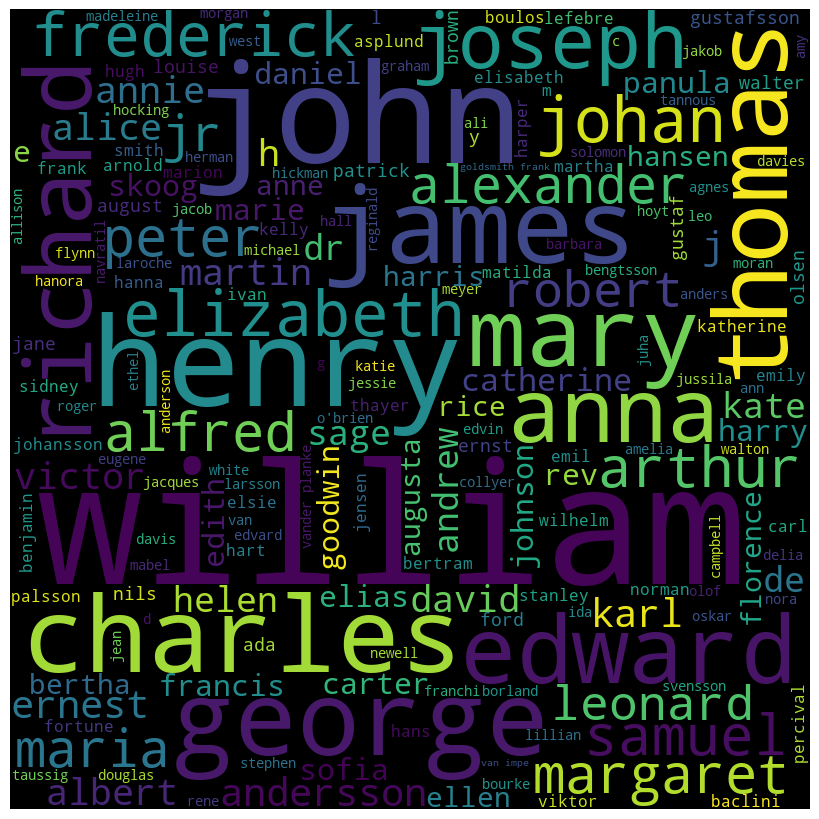

In [40]:
### PARA HACER UNA NUBE DE PALABRAS CON LOS NOMBRES.

from wordcloud import WordCloud, STOPWORDS



palabras = ''
stopwords = set(STOPWORDS)

for val in titan_words.NAME:
    val = str(val) 
    tokens = val.split()     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    palabras += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(palabras)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('img/wordcloud.png')
plt.show()